In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,accuracy_score

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
emotion_dict = {0: "Angry", 1: "Happy", 2: "Neutral", 3: "Sad", 4: "Surprised"}
# load json and create model
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [3]:
# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")


Loaded model from disk


# preprocessing for test

In [4]:
# # Define a custom preprocessing function for sharpening
def sharpen_image(image):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (0, 0), 3)# The kernal(0,0) , sigma=3 .

    # Perform high-pass filtering for edge enhancement
    #adding the weighted combination of the (gray) and (blurred). 
    # The weight of the grayscale image= 2 ,the weight of the blurred= -1 .
    sharp = cv2.addWeighted(image, 2, blurred, -1, 0)

    # Return the sharpened image
    return sharp

test_data_gen = ImageDataGenerator(preprocessing_function=sharpen_image)

In [5]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 5989 images belonging to 5 classes.


# Prediction

In [7]:
# do prediction on test data
predictions = emotion_model.predict(test_generator)

94/94 [==============================] - 94s 1s/step


In [8]:
# see predictions
for result in predictions:   
    max_index = int(np.argmax(result))
    print(emotion_dict[max_index])

Happy
Surprised
Sad
Happy
Surprised
Sad
Angry
Neutral
Happy
Happy
Surprised
Sad
Angry
Angry
Sad
Neutral
Happy
Neutral
Happy
Surprised
Surprised
Happy
Surprised
Sad
Sad
Happy
Happy
Sad
Happy
Sad
Surprised
Angry
Happy
Angry
Angry
Sad
Surprised
Sad
Sad
Angry
Angry
Neutral
Sad
Sad
Sad
Happy
Happy
Neutral
Neutral
Happy
Neutral
Surprised
Sad
Neutral
Surprised
Happy
Sad
Neutral
Surprised
Angry
Angry
Happy
Surprised
Surprised
Sad
Happy
Happy
Surprised
Surprised
Neutral
Neutral
Surprised
Surprised
Happy
Happy
Sad
Sad
Surprised
Happy
Angry
Angry
Happy
Neutral
Neutral
Happy
Happy
Surprised
Happy
Happy
Neutral
Happy
Sad
Neutral
Angry
Surprised
Sad
Neutral
Angry
Neutral
Surprised
Neutral
Happy
Happy
Sad
Happy
Sad
Neutral
Happy
Neutral
Happy
Happy
Surprised
Happy
Happy
Happy
Surprised
Happy
Neutral
Happy
Sad
Surprised
Happy
Sad
Angry
Sad
Neutral
Sad
Happy
Surprised
Happy
Happy
Sad
Sad
Sad
Neutral
Neutral
Happy
Happy
Happy
Sad
Happy
Sad
Angry
Sad
Angry
Neutral
Neutral
Angry
Sad
Sad
Sad
Happy
Sad
Sad


# Performance

-----------------------------------------------------------------
[[157 307 163 230 101]
 [254 547 335 380 235]
 [187 384 241 278 136]
 [195 363 264 246 159]
 [126 238 163 189 111]]
-----------------------------------------------------------------


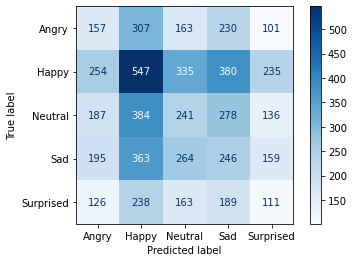

In [9]:
emotion_label = ["Angry","Happy","Neutral","Sad","Surprised"]
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
print("-----------------------------------------------------------------")
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_label)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [10]:
# Classification report
emotion_dict = {0: "Angry", 1: "Happy", 2: "Neutral", 3: "Sad", 4: "Surprised"}
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))


-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.17      0.16      0.17       958
           1       0.30      0.31      0.30      1751
           2       0.21      0.20      0.20      1226
           3       0.19      0.20      0.19      1227
           4       0.15      0.13      0.14       827

    accuracy                           0.22      5989
   macro avg       0.20      0.20      0.20      5989
weighted avg       0.22      0.22      0.22      5989

